In [2]:
import numpy as np
import matplotlib.pyplot as plt

from algorithms import *
from benchmark import *

test_functions  = [StybliskiTang, Rastrigin, Rosenbrock, Beale, Sphere, Perm, GoldsteinPrice, Ackley, Bohachevsky]
algorithms_list = [bayesian_optimization, bfgs, latin_hypercube, nelder_mead, particle_swarm, response_surface, sobol]

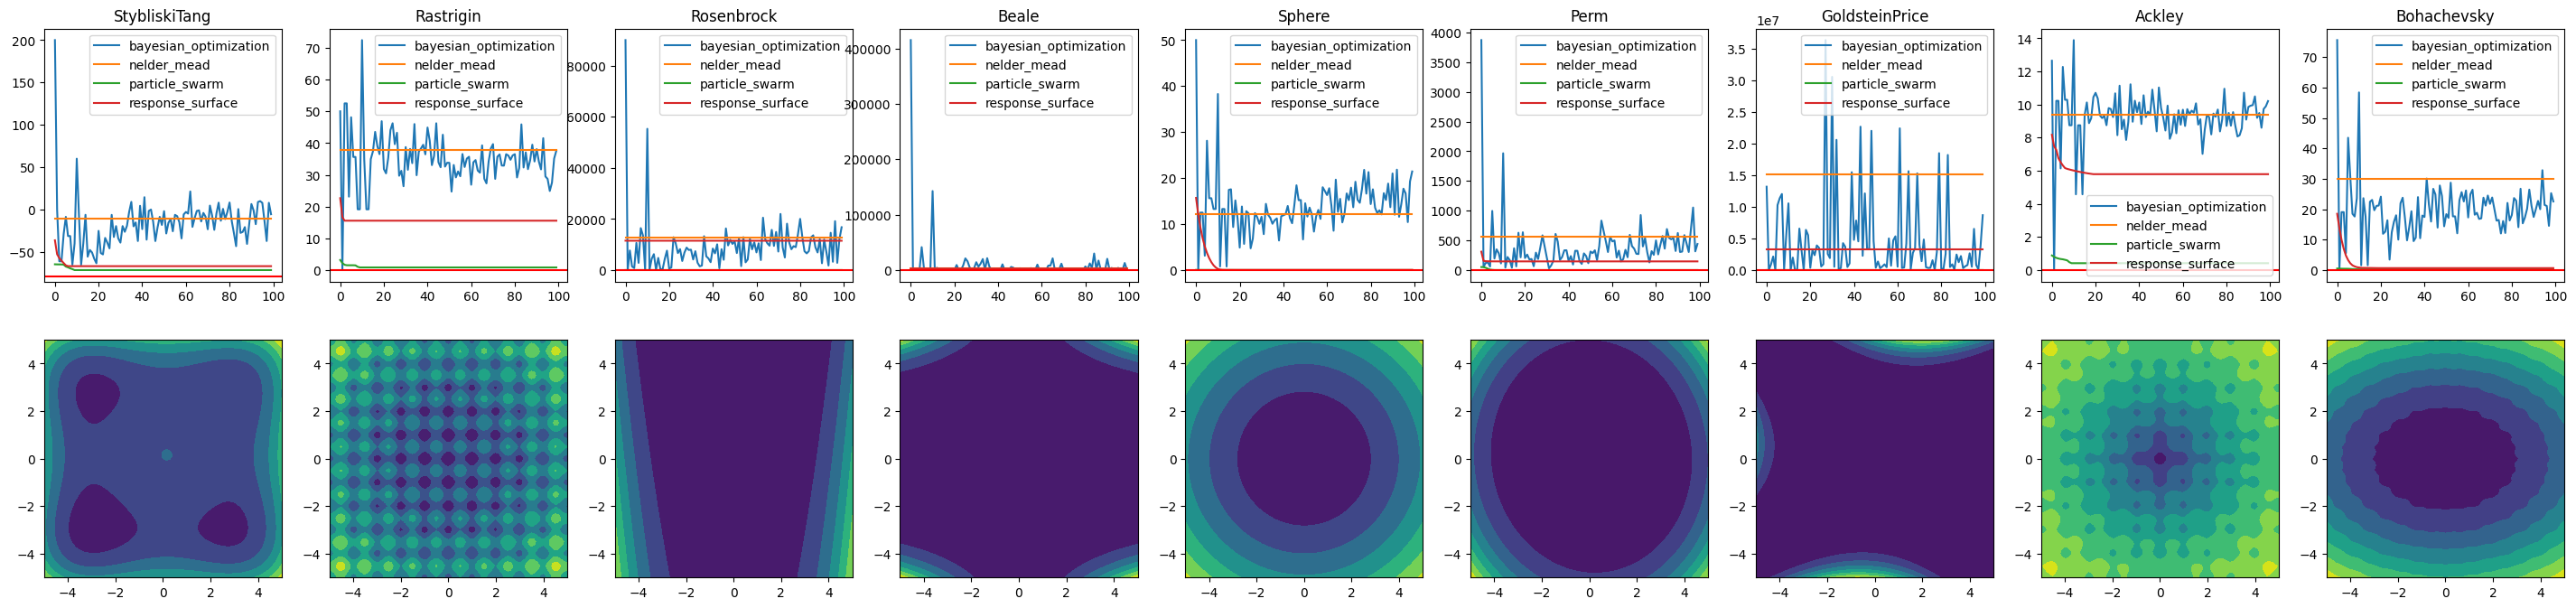

In [2]:
budget = 100
tests  = 10

X1 =  X2 = np.linspace(-5, 5, 101)
points = np.array([[x1,x2] for x1 in X1 for x2 in X2])

fig, ax = plt.subplots(2, len(test_functions), figsize=(4*len(test_functions),8))
colors = ["blue","orange","green"]
for idx, fcn in enumerate(test_functions):

    Fx = fcn(points.T)

    # Draw the test function
    ax[1,idx].contourf(X1,X2,Fx.reshape(101,101).T)
    ax[1,idx].axis('scaled')  

    lines = []
    for ii, alg in enumerate(algorithms_list):
        Y_log = []
        for test in range(tests):
            if   (ii == 0): # Bayesian Optmization
                _, _, _, Y = alg(fcn, dimension=2, n_samples=15, sampling_budget=budget, sampling_method="sobol", boundaries=[[-5,-5],[5,5]])

            elif (ii == 1): # BFGS
                _, _, _, Y = alg(fcn, dimension=2, boundaries=[[-5,-5],[5,5]], sampling_budget=budget, tol=10e-6, verbose=False)

            elif (ii == 2): # Latin Hypercube
                _, _, _, Y = alg(fcn, dimension=2, n_samples=budget, boundaries=[[-5,-5],[5,5]])
                
            elif (ii == 3): # Nelder Mead
                _, _, _, Y = alg(fcn, dimension=2, boundaries=[[-5,-5],[5,5]])

            elif (ii == 4): # Particle Swarm
                _, _, _, Y = alg(fcn, dimension=2, boundaries=[[-5,-5],[5,5]], vel_boundaries=[[0,0],[0.1,0.1]], sampling_budget=budget, 
                   sampling_method="sobol", n_particles=10, tollerance=10e-6, c1=0.1, c2=0.1, w=0.8)

            elif (ii == 5): # Response Surface Modeling
                _, _, _, Y = alg(fcn, boundaries=[[-5,-5],[5,5]], dimension=2,sampling_budget=budget, tol = 1e-8, sampling_method="box_behnken", sampling_bound=0.5,
                     iteration_method="gradient", learning_rate=0.01, verbose=False)
            elif (ii == 6): # Sobol
                _, _, _, Y = alg(fcn, dimension=2, n_samples=budget, boundaries=[[-5,-5],[5,5]])
                
            Y_log.append(Y)

        for i,l in enumerate(Y_log): 
            if (len(l) < 100):
                for x in range(100-len(l)): 
                    Y_log[i] = np.append(Y_log[i], Y_log[i][-1])

        Y_log = np.vstack(Y_log)

        Ystd  = np.std(Y_log, axis=0)
        Ymean = np.mean(Y_log, axis=0)
        


        # Plot the performances
        if (ii in [2,6,1]): continue
        ll, = ax[0,idx].plot(range(len(Ymean)), Ymean, label=alg.__name__)
        lines.append(ll)
        #ax[0,idx].fill_between(range(len(Ymean)), Ymean - Ystd, Ymean + Ystd, alpha=0.1)

    ax[0,idx].set_title(fcn.__name__)
    l = ax[0,idx].axhline(y = np.min(Fx), color = 'r', linestyle = '-')

    ax[0,idx].legend(handles=lines)

    # Draw the true minimum
    Xmin_true = points[np.argmin(Fx)]
    #ax[3,idx].scatter(Xmin_true[0], Xmin_true[1], c="white", s=3)
  
plt.show()

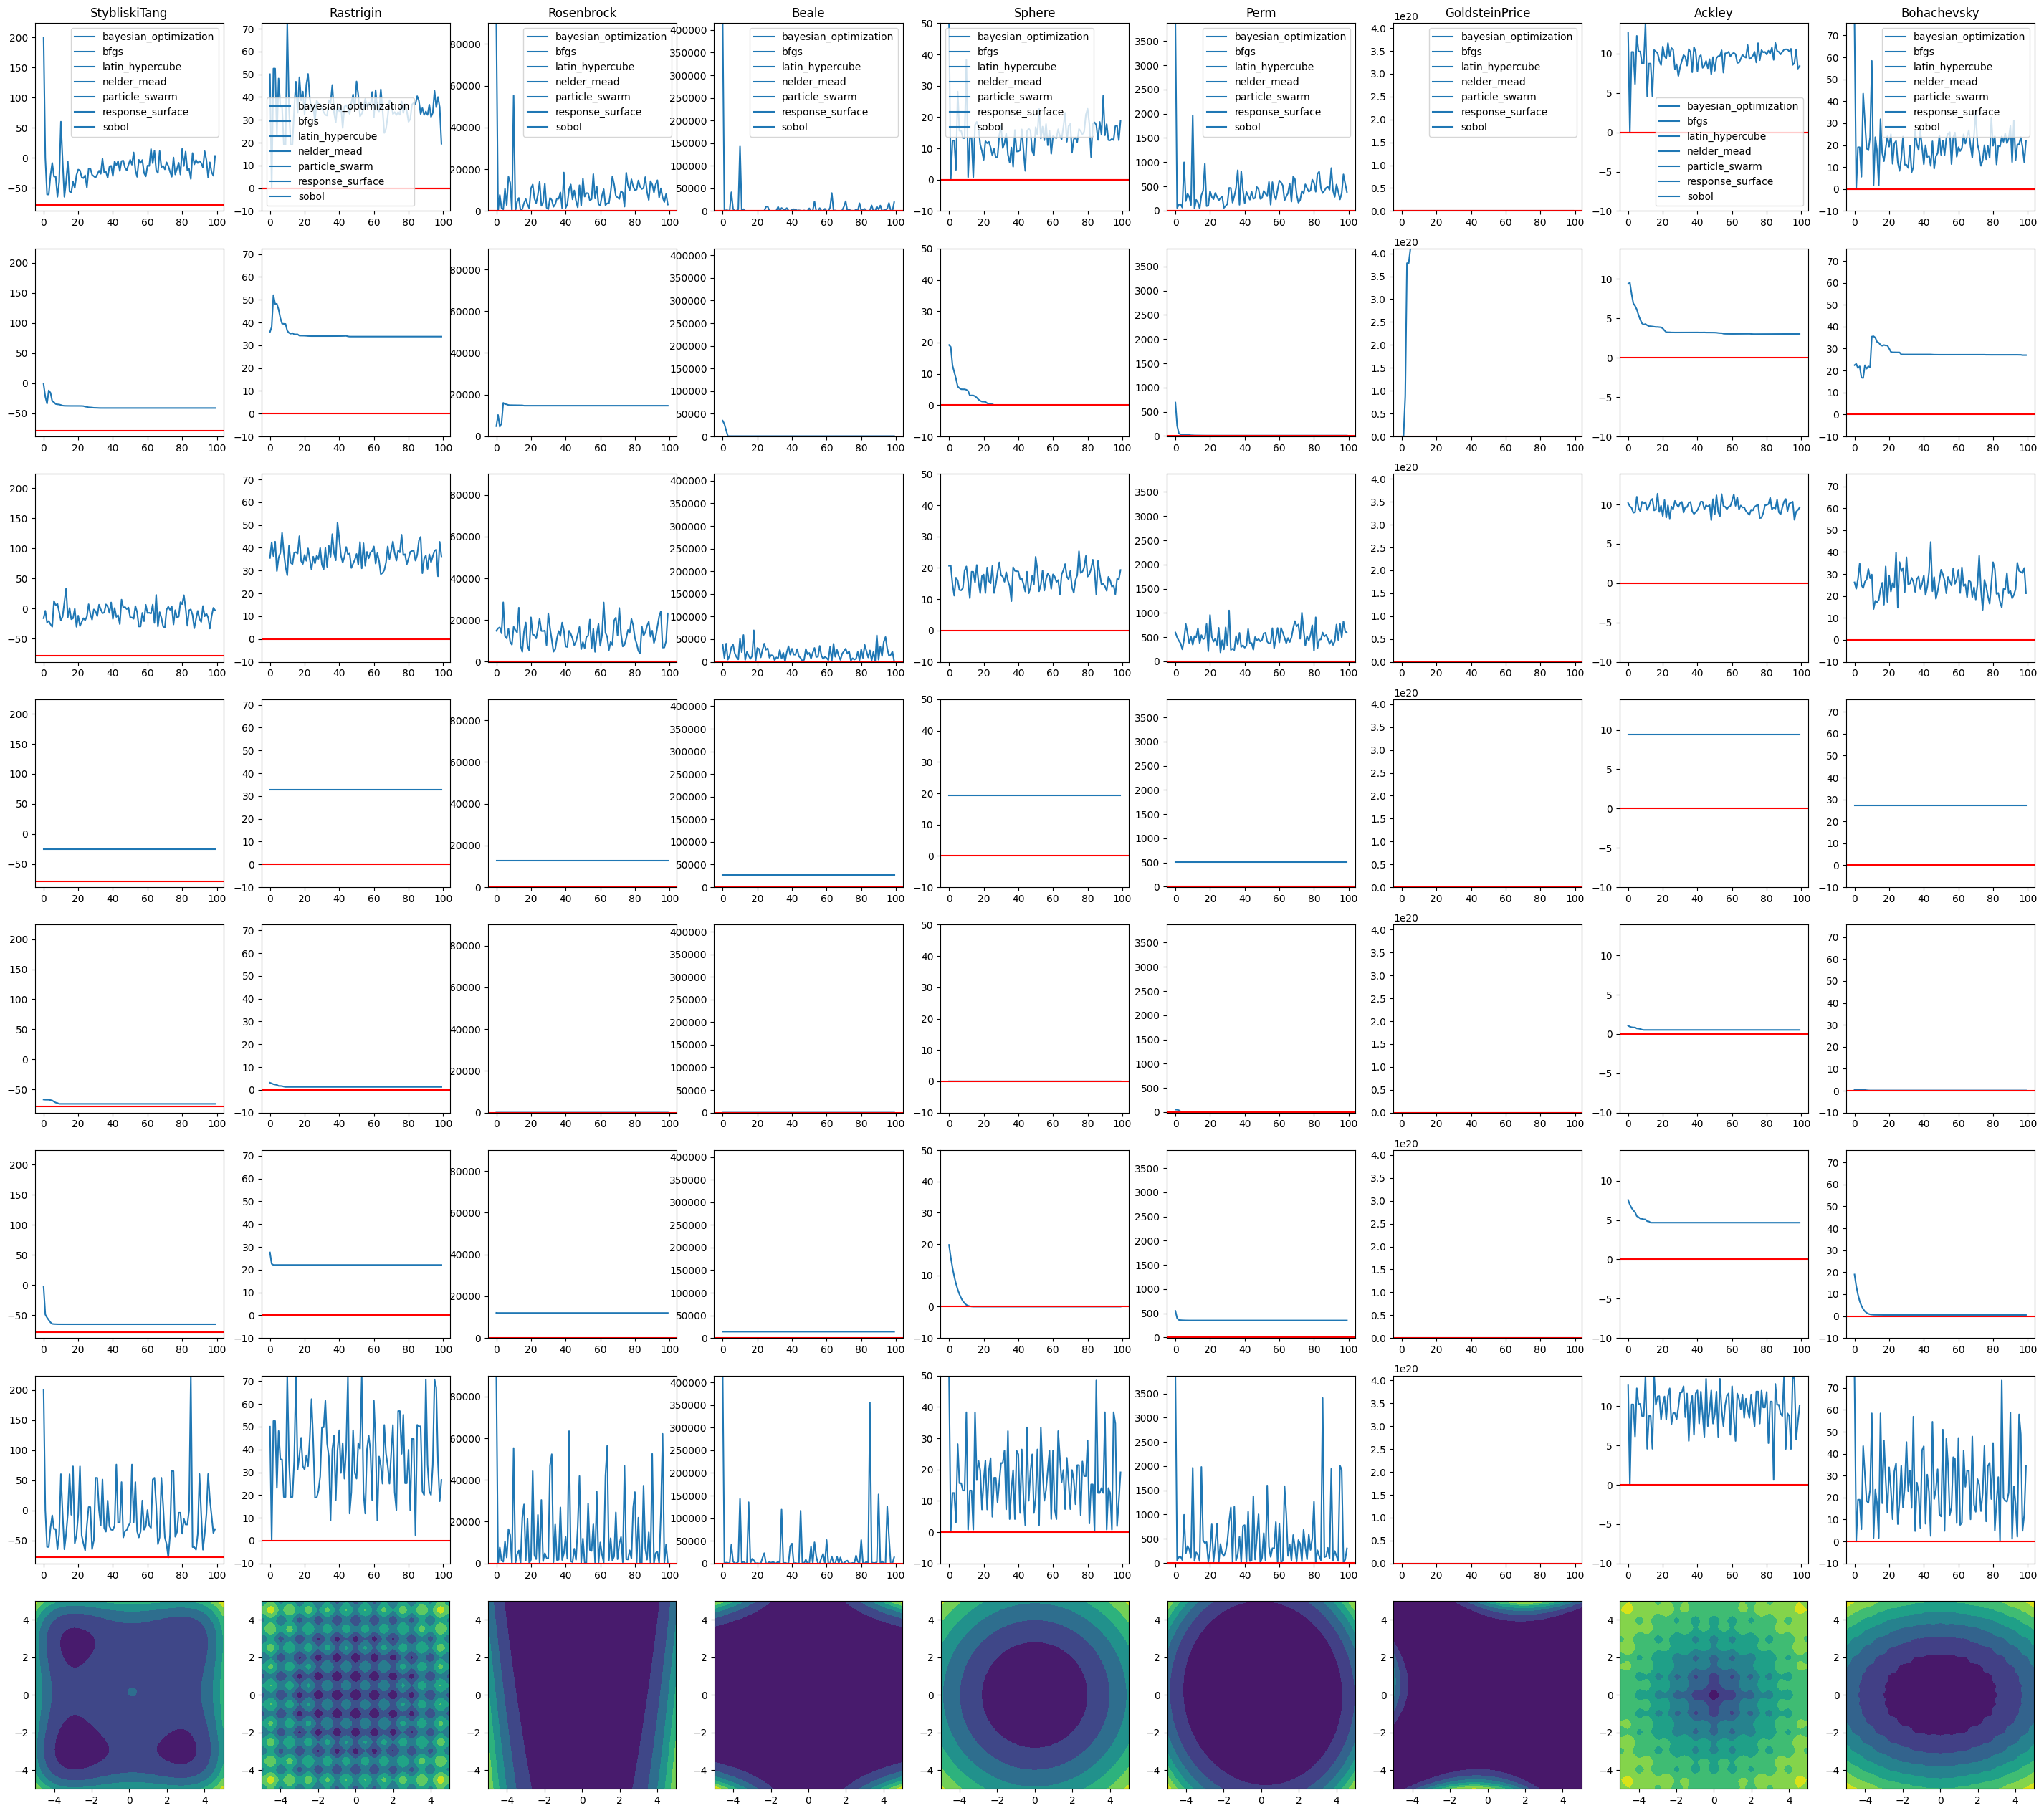

In [6]:
budget = 100
tests  = 10

X1 =  X2 = np.linspace(-5, 5, 101)
points = np.array([[x1,x2] for x1 in X1 for x2 in X2])

fig, ax = plt.subplots(8, len(test_functions), figsize=(4*len(test_functions),32))
colors = ["blue","orange","green"]
for idx, fcn in enumerate(test_functions):

    Fx = fcn(points.T)

    # Draw the test function
    ax[7,idx].contourf(X1,X2,Fx.reshape(101,101).T)
    ax[7,idx].axis('scaled')  

    lines = []
    Ylims = [np.min(Fx) - 10, np.min(Fx) + 10]
    for ii, alg in enumerate(algorithms_list):
        Y_log = []
        for test in range(tests):
            if   (ii == 0): # Bayesian Optmization
                _, _, _, Y = alg(fcn, dimension=2, n_samples=15, sampling_budget=budget, sampling_method="sobol", boundaries=[[-5,-5],[5,5]])

            elif (ii == 1): # BFGS
                _, _, _, Y = alg(fcn, dimension=2, boundaries=[[-5,-5],[5,5]], sampling_budget=budget, tol=10e-6, verbose=False)

            elif (ii == 2): # Latin Hypercube
                _, _, _, Y = alg(fcn, dimension=2, n_samples=budget, boundaries=[[-5,-5],[5,5]])
                
            elif (ii == 3): # Nelder Mead
                _, _, _, Y = alg(fcn, dimension=2, boundaries=[[-5,-5],[5,5]])

            elif (ii == 4): # Particle Swarm
                _, _, _, Y = alg(fcn, dimension=2, boundaries=[[-5,-5],[5,5]], vel_boundaries=[[0,0],[0.1,0.1]], sampling_budget=budget, 
                   sampling_method="sobol", n_particles=10, tollerance=10e-6, c1=0.1, c2=0.1, w=0.8)

            elif (ii == 5): # Response Surface Modeling
                _, _, _, Y = alg(fcn, boundaries=[[-5,-5],[5,5]], dimension=2,sampling_budget=budget, tol = 1e-8, sampling_method="box_behnken", sampling_bound=0.5,
                     iteration_method="gradient", learning_rate=0.01, verbose=False)
            elif (ii == 6): # Sobol
                _, _, _, Y = alg(fcn, dimension=2, n_samples=budget, boundaries=[[-5,-5],[5,5]])
                
            Y_log.append(Y)

        for i,l in enumerate(Y_log): 
            if (len(l) < 100):
                for x in range(100-len(l)): 
                    Y_log[i] = np.append(Y_log[i], Y_log[i][-1])

        Y_log = np.vstack(Y_log)

        Ystd  = np.std(Y_log, axis=0)
        Ymean = np.mean(Y_log, axis=0)
        


        # Plot the performances
        if (np.min(Ymean) < Ylims[0]): Ylims[0] = np.min(Ymean)
        if (np.max(Ymean) > Ylims[1]): Ylims[1] = np.max(Ymean)

        ll, = ax[ii,idx].plot(range(len(Ymean)), Ymean, label=alg.__name__)
        ax[ii,idx].axhline(y = np.min(Fx), color = 'r', linestyle = '-')
        lines.append(ll)
        #ax[0,idx].fill_between(range(len(Ymean)), Ymean - Ystd, Ymean + Ystd, alpha=0.1)

    for jj in range(len(algorithms_list)): ax[jj,idx].set_ylim(ymin=Ylims[0], ymax=Ylims[1])
    ax[0,idx].set_title(fcn.__name__)
    ax[0,idx].axhline(y = np.min(Fx), color = 'r', linestyle = '-')

    ax[0,idx].legend(handles=lines)

    # Draw the true minimum
    Xmin_true = points[np.argmin(Fx)]
    #ax[3,idx].scatter(Xmin_true[0], Xmin_true[1], c="white", s=3)
  
plt.show()